In [1]:
import us


states = us.states.STATES


In [27]:
states[0].abbr


'AL'

In [29]:
for state in us.states.STATES:
    fips = state.fips
    #sa = state.abbr.lower()
    print(fips)

01
02
04
05
06
08
09
10
11
12
13
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
44
45
46
47
48
49
50
51
53
54
55
56


In [3]:
len(states)

51

In [4]:
import pandas as pd

In [5]:
in_csv = '/Users/danielmsheehan/GitHub/mapping_healthcare_workers/data/input/lodes/ny_od_main_JT00_2017.csv.gz'

In [6]:
df = pd.read_csv(in_csv, compression='gzip')

In [7]:
df

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,360010001001004,360010020001002,1,0,1,0,1,0,0,0,0,1,20190825
1,360010001001004,360290079041013,1,0,0,1,0,1,0,0,0,1,20190825
2,360010001001004,360830523041003,1,0,1,0,0,0,1,0,0,1,20190825
3,360010001001004,360910627002014,1,0,1,0,1,0,0,0,0,1,20190825
4,360010001001004,360930330044015,1,1,0,0,0,1,0,0,0,1,20190825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603353,361231505004020,361231505002059,1,0,0,1,0,1,0,0,1,0,20190825
7603354,361231505004020,361231505002093,1,0,0,1,0,0,1,0,1,0,20190825
7603355,361231505004020,361231505003023,1,0,0,1,0,1,0,0,1,0,20190825
7603356,361231505004023,360670125002022,1,0,0,1,0,0,1,0,0,1,20190825


In [8]:
import geopandas as gpd



In [9]:
hospitals_geojson_url = 'https://opendata.arcgis.com/datasets/6ac5e325468c4cb9b905f1728d6fbf0f_0.geojson'

In [10]:
hospitals = gpd.read_file(hospitals_geojson_url )
#hospitals = hospitals[(hospitals['ST_FIPS'] =='36')]

In [11]:
#hospitals.to_csv('test.csv')

In [12]:

hospitals = hospitals[
    (hospitals['ST_FIPS'] == '36') & 
    (
        (hospitals['COUNTYFIPS'] == '36081') |
        (hospitals['COUNTYFIPS'] == '36061') |
        (hospitals['COUNTYFIPS'] == '36085') |
        (hospitals['COUNTYFIPS'] == '36047') |
        (hospitals['COUNTYFIPS'] == '36005') 
    )
]


# hospitals = hospitals.to_crs(epsg=3857)

In [13]:
hospitals['TYPE'].value_counts()

GENERAL ACUTE CARE    56
PSYCHIATRIC           12
MILITARY               4
SPECIAL                3
LONG TERM CARE         3
REHABILITATION         1
CHILDREN               1
Name: TYPE, dtype: int64

In [14]:
hospitals

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
399,400,0015210036,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH,BRONX,NY,10036,NOT AVAILABLE,(212) 430-5235,GENERAL ACUTE CARE,...,http://www.nyc.gov/html/hhc/jacobi/home.html,7000002H,NOT AVAILABLE,36,GOVERNMENT - LOCAL,-999,457,LEVEL I,Y,POINT (-73.84751 40.85630)
400,401,0015310466,MONTEFIORE MEDICAL CENTER - MOSES DIVISION,111 E 210TH ST,BRONX,NY,10466,NOT AVAILABLE,(718) 920-4321,GENERAL ACUTE CARE,...,http://www.montefiore.org,7000006H,NOT AVAILABLE,36,NON-PROFIT,-999,779,NOT AVAILABLE,N,POINT (-73.87983 40.88008)
402,403,0015610467,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVE,BRONX,NY,10467,NOT AVAILABLE,(718) 519-5000,GENERAL ACUTE CARE,...,http://www.nyc.gov/html/hhc/ncbh/html/home/hom...,7000024H,NOT AVAILABLE,36,GOVERNMENT - LOCAL,-999,213,NOT AVAILABLE,N,POINT (-73.88106 40.88037)
404,405,0016111212,BROOKDALE HOSPITAL MEDICAL CENTER,1 BROOKDALE PLAZA,BROOKLYN,NY,11212,NOT AVAILABLE,(718) 240-5000,GENERAL ACUTE CARE,...,http://www.brookdalehospital.org,7001002H,NOT AVAILABLE,36,NON-PROFIT,-999,530,LEVEL II,N,POINT (-73.91256 40.65527)
405,406,0016211201,BROOKLYN HOSPITAL CENTER,121 DEKALB AVE,BROOKLYN,NY,11201,NOT AVAILABLE,(718) 250-8000,GENERAL ACUTE CARE,...,http://www.tbh.org,7001003H,NOT AVAILABLE,36,NON-PROFIT,-999,464,NOT AVAILABLE,N,POINT (-73.97788 40.69057)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5500,3920,0171811427,CREEDMOOR PSYCHIATRIC CENTER,79-25 WINCHESTER BLVD,QUEENS VILLAGE,NY,11427,2147,(718) 464-7500,PSYCHIATRIC,...,https://www.omh.ny.gov/omhweb/facilities/crpc/,NOT AVAILABLE,NOT AVAILABLE,36,GOVERNMENT - STATE,-999,-999,NOT AVAILABLE,N,POINT (-73.73153 40.74114)
5501,3921,0177611426,NEW YORK CITY CHILDREN'S CENTER QUEENS INPATIENT,74-03 COMMONWEALTH BLVD,BELLEROSE,NY,11426,NOT AVAILABLE,(718) 264-4500,PSYCHIATRIC,...,https://www.omh.ny.gov/omhweb/facilities/nyccc...,NOT AVAILABLE,NOT AVAILABLE,36,GOVERNMENT - STATE,-999,-999,NOT AVAILABLE,N,POINT (-73.72574 40.74554)
5502,3922,0175910305,SOUTH BEACH PSYCHIATRIC CENTER,777 SEAVIEW AVENUE,STATEN ISLAND,NY,10305,NOT AVAILABLE,(718) 667-2300,PSYCHIATRIC,...,https://www.omh.ny.gov/omhweb/facilities/sbpc/,NOT AVAILABLE,NOT AVAILABLE,36,GOVERNMENT - STATE,-999,-999,NOT AVAILABLE,N,POINT (-74.08062 40.58202)
5836,6256,0019010044,COLER-GOLDWATER SPECIALTY HOSPITAL & NURSING F...,900 MAIN STREET ROOSEVELT ISLAND,NEW YORK,NY,10044,NOT AVAILABLE,(212) 848-6000,LONG TERM CARE,...,http://www.nychealthandhospitals.org/coler/,7002051H,NOT AVAILABLE,36,GOVERNMENT - LOCAL,-999,210,NOT AVAILABLE,N,POINT (-73.94214 40.77030)


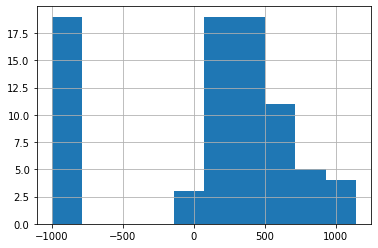

In [18]:
hospitals['BEDS'].hist();

In [19]:
import contextily as ctx

/Users/danielmsheehan/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


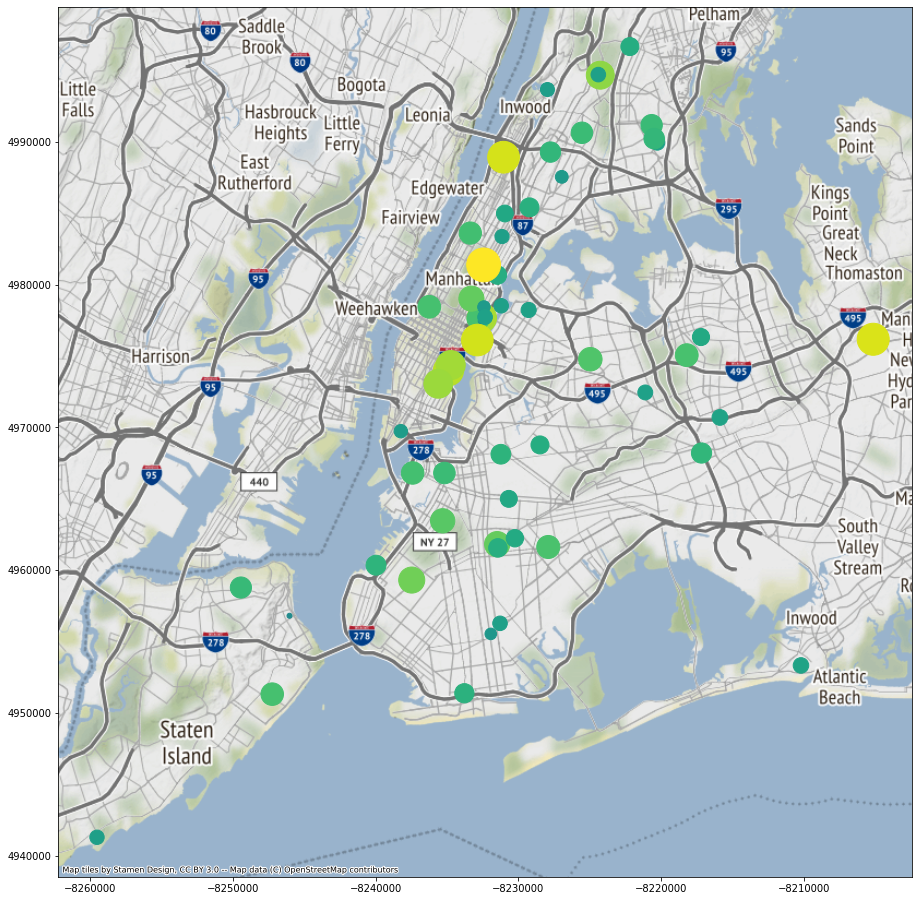

In [17]:
ax = hospitals.to_crs(epsg=3857).plot(column='BEDS', figsize=(16, 16), markersize='BEDS')

ctx.add_basemap(ax)

In [20]:
hospitals.columns

Index(['OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'ZIP4',
       'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY', 'COUNTYFIPS',
       'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC',
       'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STATE_ID',
       'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF', 'BEDS', 'TRAUMA',
       'HELIPAD', 'geometry'],
      dtype='object')

In [21]:
hospitals['CITY'].value_counts()

NEW YORK            27
BROOKLYN            18
BRONX               15
STATEN ISLAND        6
JAMAICA              3
FLUSHING             2
WARDS ISLAND         2
ELMHURST             1
NEW HYDE PARK        1
BELLEROSE            1
LONG ISLAND CITY     1
QUEENS VILLAGE       1
FAR ROCKAWAY         1
FOREST HILLS         1
Name: CITY, dtype: int64

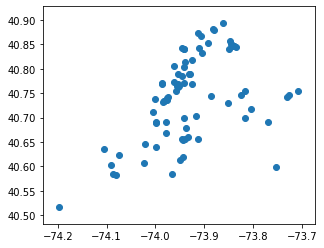

In [22]:
hospitals.plot()

In [23]:
'36061', '36085', '36005', '36081', '36047'

('36061', '36085', '36005', '36081', '36047')

In [24]:
def point_in_polygon(point_gdf, poly_gdf):
    return gpd.sjoin(
        point_gdf,
        poly_gdf,
        how="inner",
        op='intersects',  # warning CRS of frames do not match
    )


In [25]:
blocks_shp = '/Users/danielmsheehan/GitHub/mapping_healthcare_workers/data/input/census/tl_2017_36_tabblock10/tl_2017_36_tabblock10.shp'

In [26]:
blocks = gpd.read_file(blocks_shp)



In [181]:
blocks.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10', 'GEOID10',
       'NAME10', 'MTFCC10', 'UR10', 'UACE10', 'UATYPE', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'geometry'],
      dtype='object')

In [182]:
blocks['COUNTYFP10'].value_counts()

103    28892
059    22127
119    15170
081    14858
029    13550
       ...  
121     1982
123     1885
097     1880
041     1592
073     1525
Name: COUNTYFP10, Length: 62, dtype: int64

In [183]:
blocks = blocks[
    (blocks['COUNTYFP10'] == '081') |
    (blocks['COUNTYFP10'] == '061') |
    (blocks['COUNTYFP10'] == '085') |
    (blocks['COUNTYFP10'] == '047') |
    (blocks['COUNTYFP10'] == '005')  
]

In [184]:
len(hospitals)

80

In [186]:
#blocks.plot(ax)

In [187]:
hosp_int_blocks = gpd.sjoin(
    hospitals.to_crs(epsg=2263), 
    blocks.to_crs(epsg=2263),
    how="left",
    op='intersects',  
)

    

In [188]:
len(hosp_int_blocks)

80

In [189]:
hosp_int_blocks[['NAME', 'GEOID10']].sort_values('NAME', ascending=True)

,NAME,GEOID10
1004,BELLEVUE HOSPITAL CENTER,360610062001002
6486,BRONX PSYCHIATRIC CENTER,360050284001010
151,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,360050227031004
139,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,360050145001000
985,BROOKDALE HOSPITAL MEDICAL CENTER,360470890006003
...,...,...
5968,UNIVERSITY HOSPITAL OF BROOKLYN,360470816001001
5982,VA MEDICAL CENTER - BROOKLYN CAMPUS,360470164001020
5980,VA MEDICAL CENTER - MANHATTAN CAMPUS,360610062001005
5941,WOODHULL MEDICAL AND MENTAL HEALTH CENTER,360470285011001


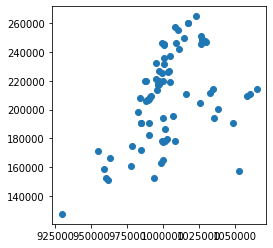

In [190]:
hosp_int_blocks.plot()

In [204]:
hosp_int_blocks.to_csv('test2.csv')

In [192]:
# test123 = gpd.sjoin(
#         blocks,
#         hospitals,
#         how="inner",
#         op='intersects',  # warning CRS of frames do not match
#     )


In [193]:
# test123.plot(figsize=(16, 16))

In [194]:
test123[['NAME', 'GEOID10']]

,NAME,GEOID10
29700,BROOKLYN HOSPITAL CENTER,360470031003000
31474,JAMES J. PETERS VA MEDICAL CENTER,360050261001000
34396,BURKE REHABILITATION CENTER,360050266023008
54379,MONTEFIORE WESTCHESTER SQUARE MEDICAL CENTER,360050204002000
73193,MONTEFIORE MEDICAL CENTER - MOSES DIVISION,360050421001000
73193,NORTH CENTRAL BRONX HOSPITAL,360050421001000
84882,RICHMOND UNIVERSITY MEDICAL CENTER - BAYLEY SE...,360850027001006
96752,MONTEFIORE MED CENTER - JACK D WEILER HOSP OF ...,360050286001000
113937,NYU LUTHERAN MEDICAL CENTER,360470022001001
116594,MOUNT SINAI BETH ISRAEL BROOKLYN,360470746002003


In [226]:
dfs = df[df['w_geocode'] == 360610255001010]  # this is block next to hosptial 

# need to buffer


dfs['S000'].sum()

8960

In [217]:
df.dtypes


w_geocode     int64
h_geocode     int64
S000          int64
SA01          int64
SA02          int64
SA03          int64
SE01          int64
SE02          int64
SE03          int64
SI01          int64
SI02          int64
SI03          int64
createdate    int64
dtype: object

In [197]:
import matplotlib.pyplot as plt

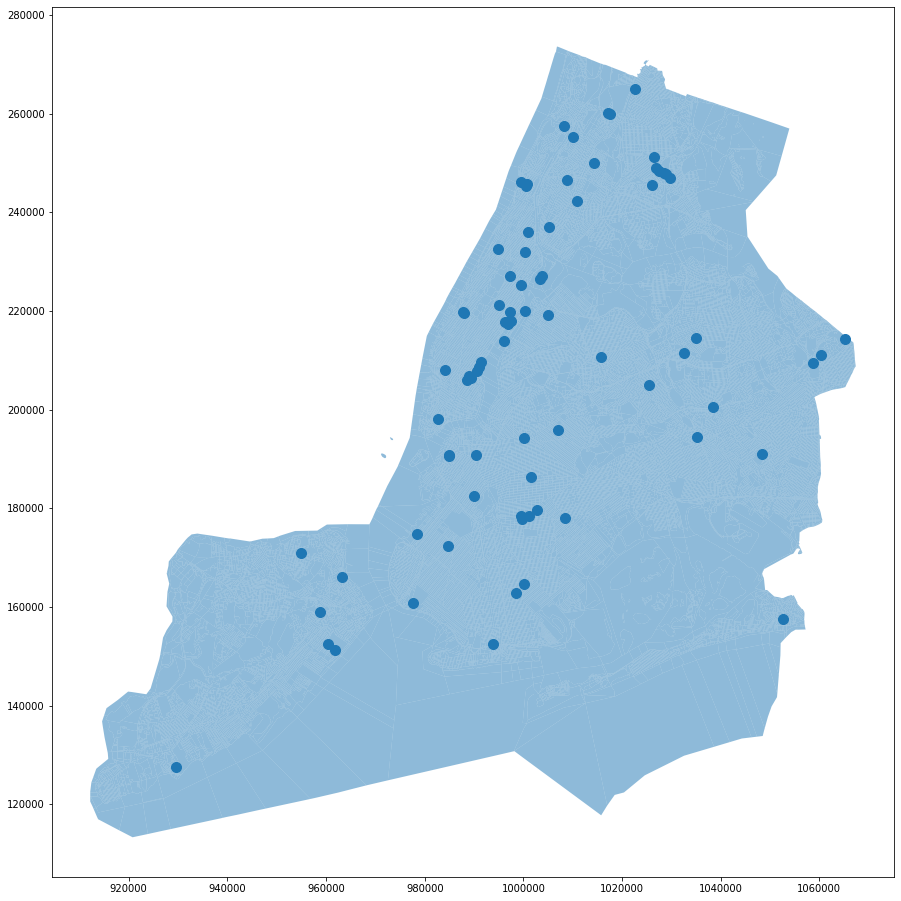

In [198]:
fig, ax = plt.subplots(figsize=(16, 16))

blocks.to_crs(epsg=2263).plot(ax=ax, alpha=0.5)

hosp_int_blocks.plot(ax=ax, markersize=100)

    

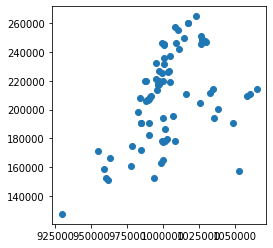

In [199]:
hosp_int_blocks.plot()

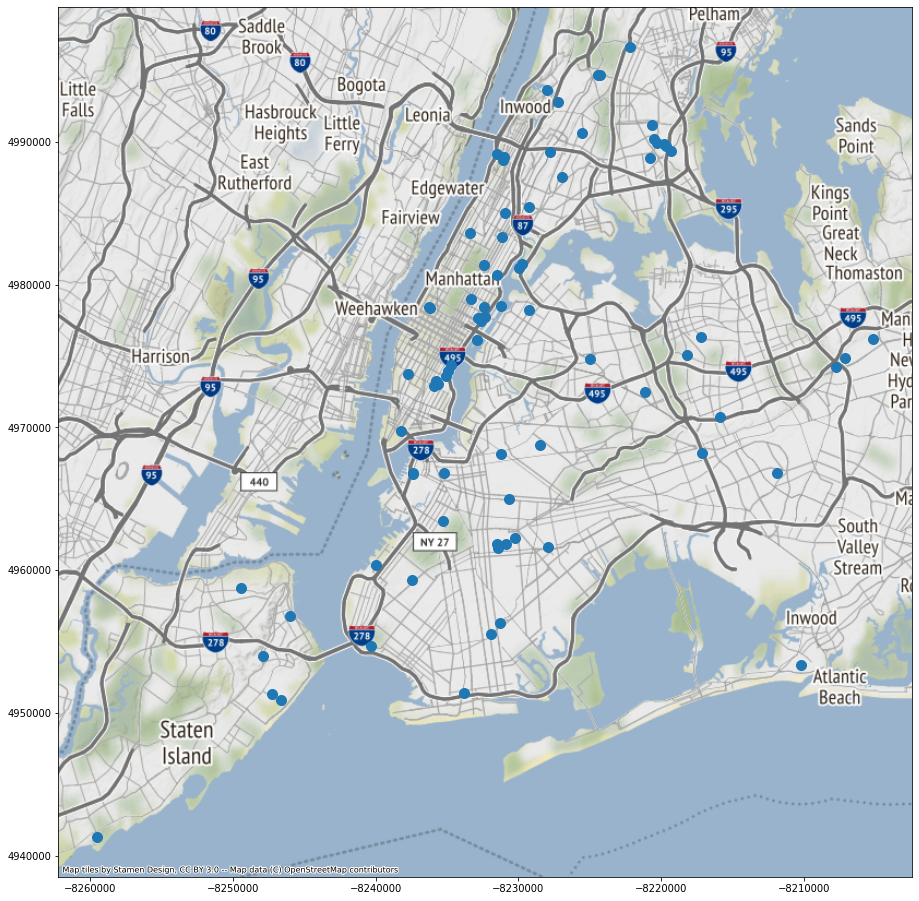

In [200]:
fig, ax = plt.subplots(figsize=(16, 16))

# blocks.to_crs(epsg=2263).plot(ax=ax, alpha=0.5)

hosp_int_blocks.to_crs(epsg=3857).plot(ax=ax, markersize=100)

ctx.add_basemap(ax)

In [201]:
blocks.crs

{'init': 'epsg:4269'}

In [202]:
hosp_int_blocks.crs

{'init': 'epsg:2263', 'no_defs': True}

In [229]:
# x = gpd.overlay(df1, df2, how='intersection', make_valid=True, keep_geom_type=True)

In [267]:
hospitals_buffer = hospitals.to_crs(epsg=2263) #.copy()
hospitals_buffer['geometry'] = hospitals_buffer['geometry'].buffer(1000)

In [268]:
# hospitals['geometry']

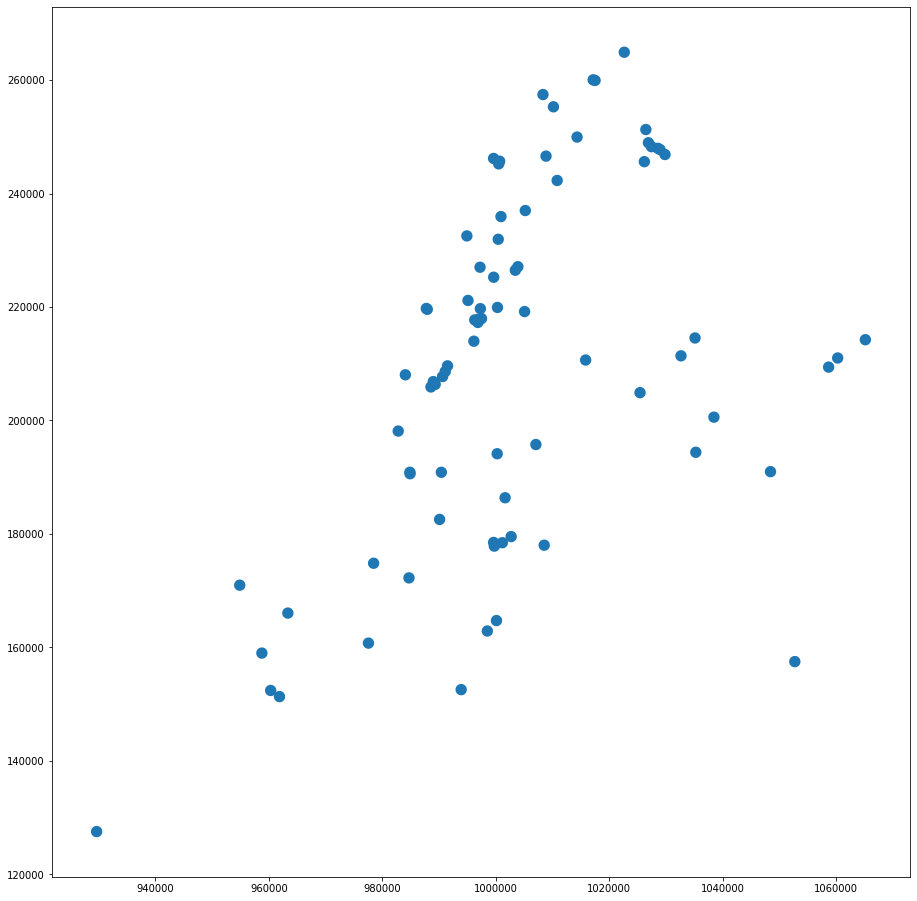

In [269]:
hospitals_buffer.plot(figsize=(16, 16))

In [270]:
hospitals_buffer_int_blocks = gpd.sjoin(
    hospitals_buffer, 
    blocks.to_crs(epsg=2263),
    how="left",
    op='intersects',  
)

In [271]:
hospitals_buffer_int_blocks 

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10
139,7140,0015010456,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,1276 FULTON AVE,BRONX,NY,10456,NOT AVAILABLE,(718) 409-7742,GENERAL ACUTE CARE,...,Block 3003,G5040,U,63217,U,S,10071,0,+40.8289182,-073.9021832
139,7140,0015010456,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,1276 FULTON AVE,BRONX,NY,10456,NOT AVAILABLE,(718) 409-7742,GENERAL ACUTE CARE,...,Block 3004,G5040,U,63217,U,S,3495,0,+40.8287933,-073.9028943
139,7140,0015010456,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,1276 FULTON AVE,BRONX,NY,10456,NOT AVAILABLE,(718) 409-7742,GENERAL ACUTE CARE,...,Block 2000,G5040,U,63217,U,S,29153,0,+40.8293156,-073.9036731
139,7140,0015010456,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,1276 FULTON AVE,BRONX,NY,10456,NOT AVAILABLE,(718) 409-7742,GENERAL ACUTE CARE,...,Block 2001,G5040,U,63217,U,S,11117,0,+40.8298712,-073.9046009
139,7140,0015010456,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,1276 FULTON AVE,BRONX,NY,10456,NOT AVAILABLE,(718) 409-7742,GENERAL ACUTE CARE,...,Block 1001,G5040,U,63217,U,S,20606,0,+40.8300915,-073.9055936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,3922,0175910305,SOUTH BEACH PSYCHIATRIC CENTER,777 SEAVIEW AVENUE,STATEN ISLAND,NY,10305,NOT AVAILABLE,(718) 667-2300,PSYCHIATRIC,...,Block 1005,G5040,U,63217,U,S,1014017,0,+40.5853407,-074.0800541
6502,3922,0175910305,SOUTH BEACH PSYCHIATRIC CENTER,777 SEAVIEW AVENUE,STATEN ISLAND,NY,10305,NOT AVAILABLE,(718) 667-2300,PSYCHIATRIC,...,Block 1018,G5040,U,63217,U,S,14059,0,+40.5789656,-074.0800094
6502,3922,0175910305,SOUTH BEACH PSYCHIATRIC CENTER,777 SEAVIEW AVENUE,STATEN ISLAND,NY,10305,NOT AVAILABLE,(718) 667-2300,PSYCHIATRIC,...,Block 1017,G5040,U,63217,U,S,14177,0,+40.5796142,-074.0794083
6502,3922,0175910305,SOUTH BEACH PSYCHIATRIC CENTER,777 SEAVIEW AVENUE,STATEN ISLAND,NY,10305,NOT AVAILABLE,(718) 667-2300,PSYCHIATRIC,...,Block 1016,G5040,U,63217,U,S,118196,0,+40.5799983,-074.0829211


In [272]:
hospitals_buffer_int_blocks.drop(columns=['geometry']).to_csv('test3.csv')

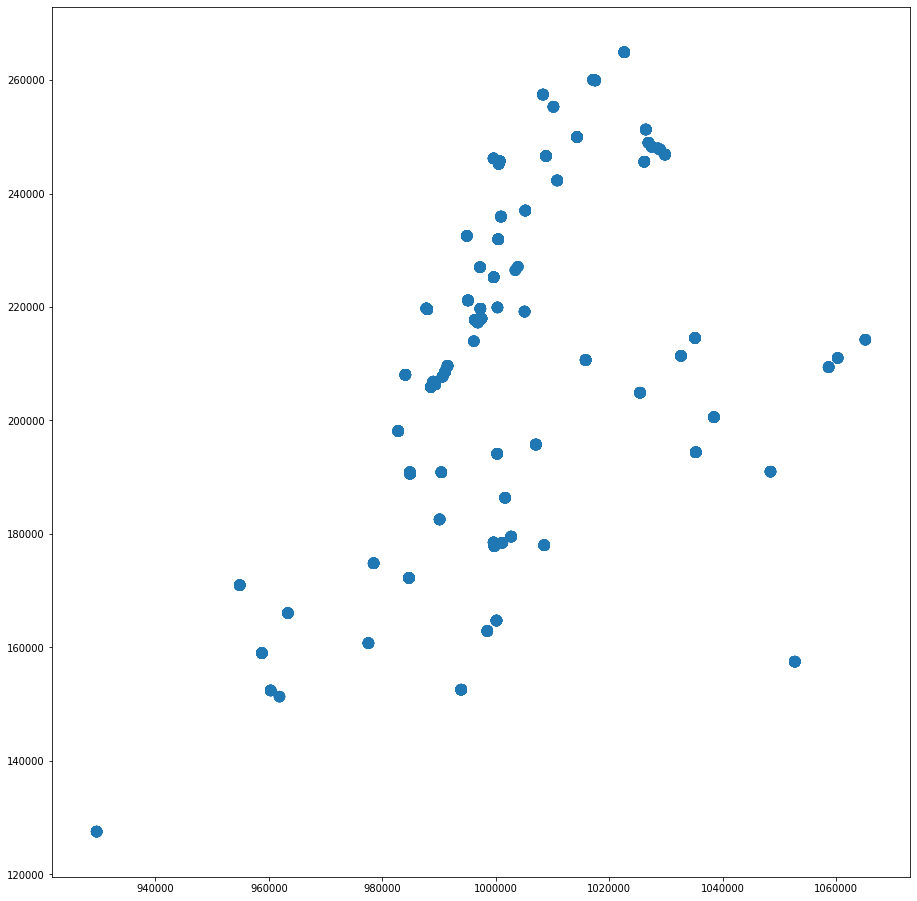

In [273]:
hospitals_buffer_int_blocks.plot(figsize=(16, 16))

In [ ]:
360610251002001
360610251001000
360610253004004
360610251001001
360610253004003
360610253006001
360610255004002
360610253004002
360610255001010
360610253006000
360610255004001
360610253004001
360610253005001
360610255004000
360610251001007
360610251002003
360610251002000
360610253003001
360610253003000
360610253004005
360610253002001
360610245001001
360610243013000
360610251001009
360610245001000
360610245002001
360610251001008
360610251001005
360610251001004
360610245002000
360610247005001
360610251001006
360610251001003
360610251002002
360610251001002

dfs = df[df['w_geocode'] == 360610255001010]  # this is block next to hosptial 
